# Load The Dataset

In [3]:
import pandas as pd

# Read the Excel file
data = pd.read_csv('Expanded_data_with_more_features.csv')

# Explore the data

In [4]:
# Print the first few rows of the dataset
print(data.head(10))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female         NaN   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   
5           5  female     group B  associate's degree      standard   
6           6  female     group B        some college      standard   
7           7    male     group B        some college  free/reduced   
8           8    male     group D         high school  free/reduced   
9           9  female     group B         high school  free/reduced   

    TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0       none             married     regularly          yes         3.0   
1        NaN             married     sometimes          yes         

In [5]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
# View the summary statistics of the numeric columns in the dataset
data.describe()

Unnamed: 0    NrSiblings     MathScore  ReadingScore  WritingScore
count  30641.000000  29069.000000  30641.000000  30641.000000  30641.000000
mean     499.556607      2.145894     66.558402     69.377533     68.418622
std      288.747894      1.458242     15.361616     14.758952     15.443525
min        0.000000      0.000000      0.000000     10.000000      4.000000
25%      249.000000      1.000000     56.000000     59.000000     58.000000
50%      500.000000      2.000000     67.000000     70.000000     69.000000
75%      750.000000      3.000000     78.000000     80.000000     79.000000
max      999.000000      7.000000    100.000000    100.000000    100.000000

In [7]:
# Identify all categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object',
'category']).columns
# View the categorical columns
print("Categorical columns:")
print(categorical_columns)
# Count unique values in each categorical column
for col in categorical_columns:
 print(f"\nColumn: {col}")
 print(data[col].value_counts())

Categorical columns:
Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'TransportMeans', 'WklyStudyHours'],
      dtype='object')

Column: Gender
Gender
female    15424
male      15217
Name: count, dtype: int64

Column: EthnicGroup
EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: count, dtype: int64

Column: ParentEduc
ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

Column: LunchType
LunchType
standard        19905
free/reduced    10736
Name: count, dtype: int64

Column: TestPrep
TestPrep
none         18856
completed     9955
Name: count, dtype: int64

Column: ParentMaritalStatus
ParentMaritalStatus
married     16844
single       7097
divorced     4919
widowed       591
Name: count, dtype: int64

Co

In [8]:
# Count missing values in each column
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

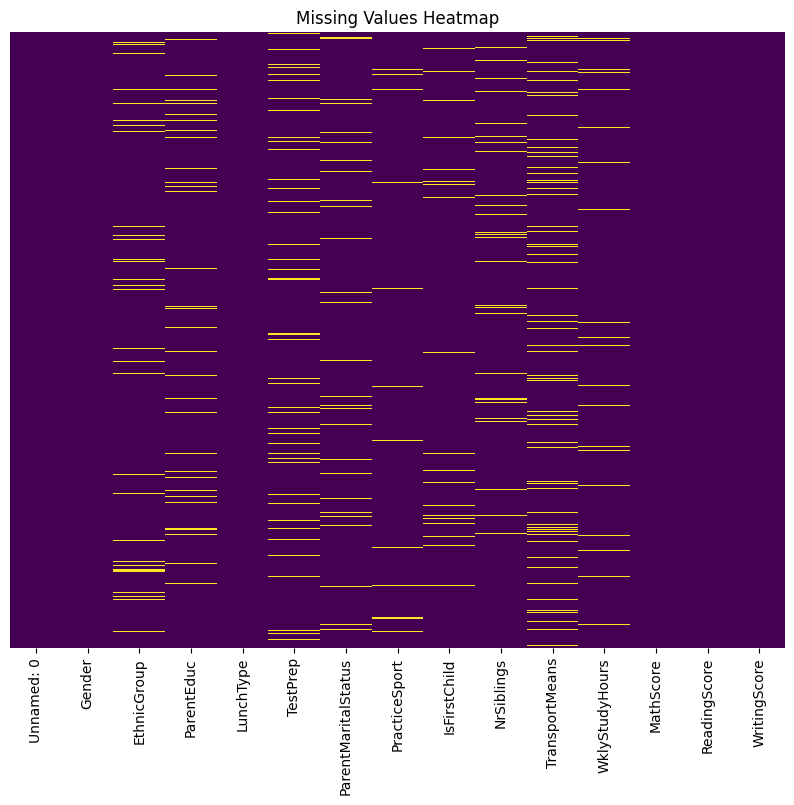

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Create a boolean DataFrame that indicates where the missing values are
missing_data = data.isnull()
# Step 2: Create the heatmap for missing values
plt.figure(figsize=(10, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)
# Add a title to the heatmap
plt.title('Missing Values Heatmap')
# Show the plot
plt.show()

In [10]:
# Categorical columns that have missing values
categorical_columns = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus',
                       'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

# Loop through each categorical column and fill missing values with the most frequent value (mode)
for col in categorical_columns:
    # Filling missing values with the most frequent value (mode) for each categorical column
    data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
# Numerical column with missing values
# For the column 'NrSiblings', we fill the missing values with the median of the column
data['NrSiblings'].fillna(data['NrSiblings'].median(), inplace=True)

In [12]:
print(data.isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


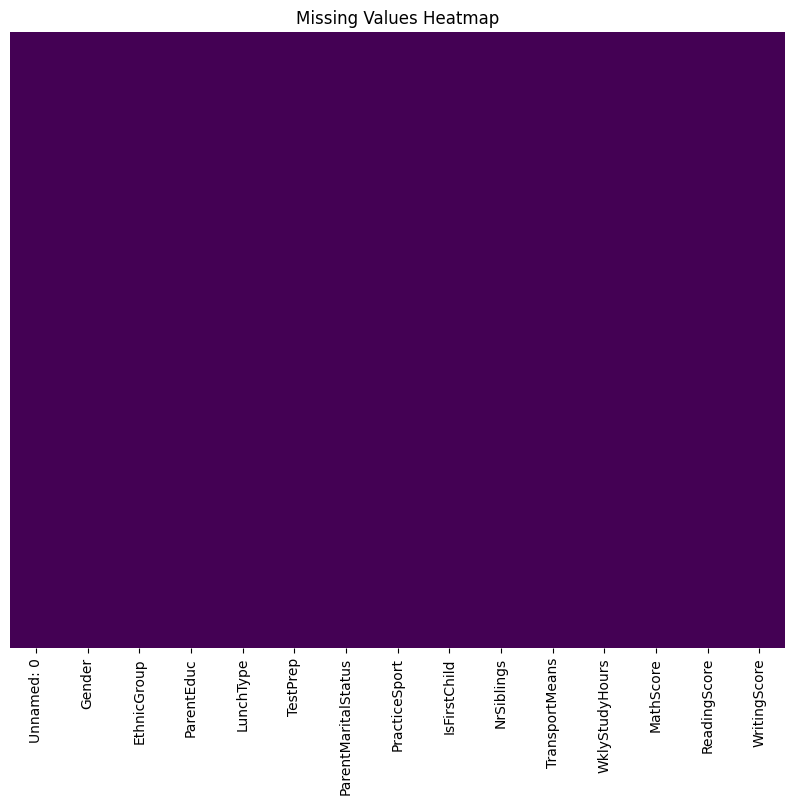

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Create a boolean DataFrame that indicates where the missing values are
missing_data = data.isnull()
# Step 2: Create the heatmap for missing values
plt.figure(figsize=(10, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)
# Add a title to the heatmap
plt.title('Missing Values Heatmap')
# Show the plot
plt.show()

# Outlier-with box plot

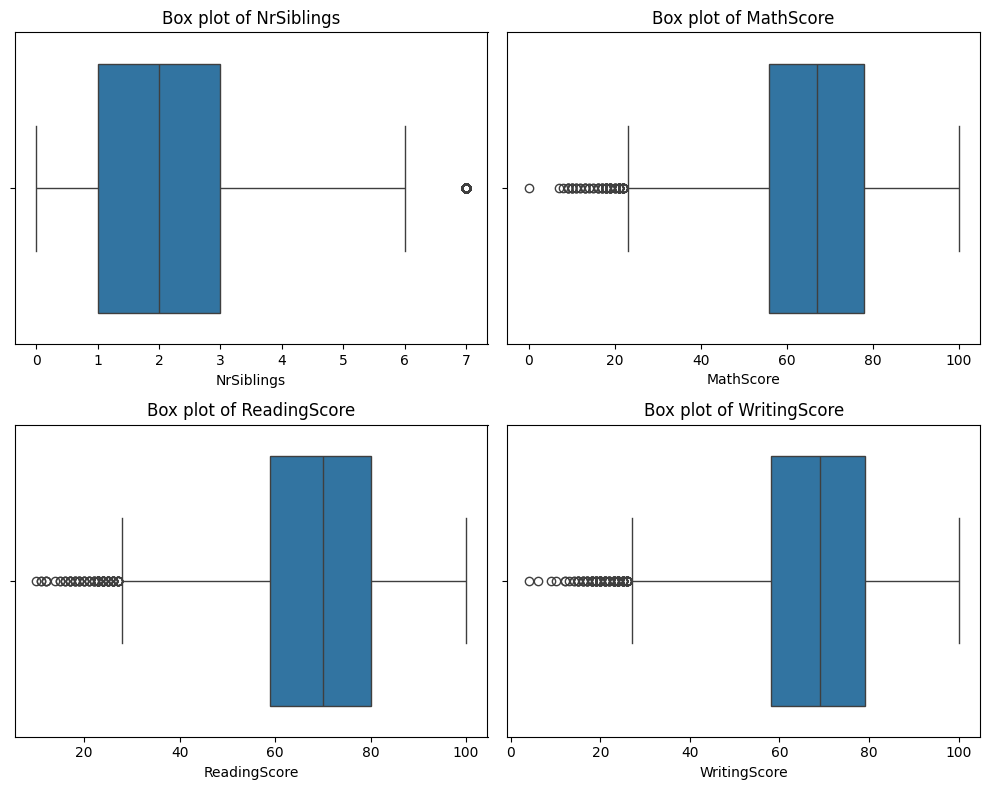

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns for which we want to check for outliers
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

# Set the size of the plots
plt.figure(figsize=(10, 8))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns, 1):
    # Create a subplot for each column
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, index i
    sns.boxplot(data=data, x=col)  # Generate the box plot for the current column
    plt.title(f'Box plot of {col}')  # Set the title for each plot

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Function to detect and remove outliers using the IQR method
def handle_outliers_iqr(df, column):
    # Calculate the first and third quartile (Q1 and Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Option 1: Remove outliers
    # Remove rows where the value in the column is outside the lower and upper bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Option 2 (alternative): Cap the outliers (commented out)
    # df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df

# Apply the outlier handling function to all numerical columns with potential outliers
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

# Loop through each numerical column and apply the IQR method
for col in numerical_columns:
    data = handle_outliers_iqr(data, col)  # Update the dataset by removing outliers

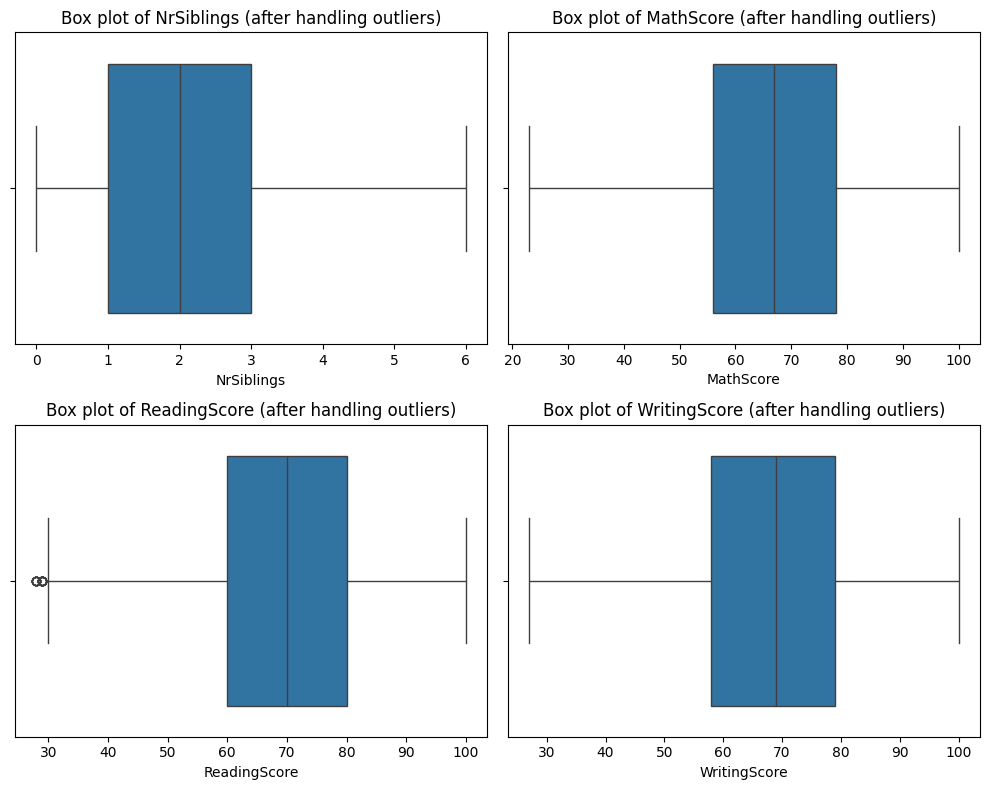

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns for which we want to check for outliers
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

# Set the size of the plots
plt.figure(figsize=(10, 8))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns, 1):
    # Create a subplot for each column
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, index i
    sns.boxplot(data=data, x=col)  # Generate the box plot for the current column
    plt.title(f'Box plot of {col} (after handling outliers)')  # Set the title for each plot

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Histogram with KDE Curves

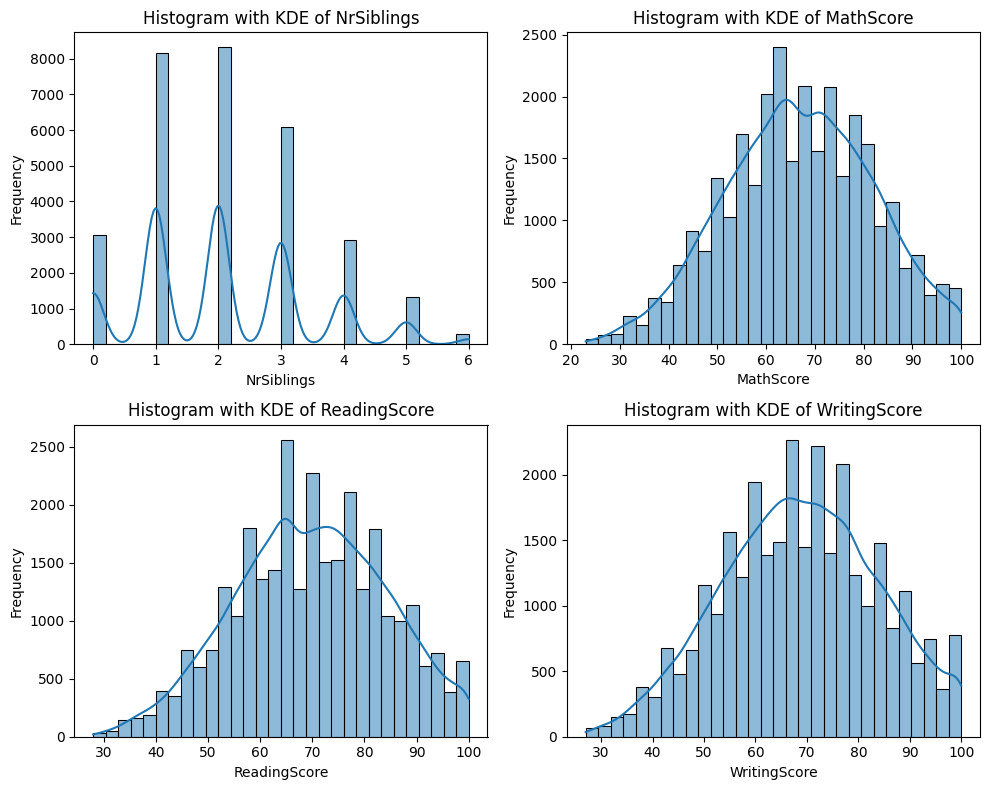

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns to plot
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

# Set the size of the plots
plt.figure(figsize=(10, 8))

# Loop through each numerical column and create a histogram with KDE curve
for i, col in enumerate(numerical_columns, 1):
    # Create a subplot for each column
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, index i
    sns.histplot(data[col], kde=True, bins=30)  # Generate the histogram with KDE curve
    plt.title(f'Histogram with KDE of {col}')  # Set the title for each plot
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Label Encoding

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original data
data_encoded = data.copy()

# List of all categorical columns
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
                        'TestPrep', 'ParentMaritalStatus', 'PracticeSport',
                        'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns
for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column].astype(str))

# Verify the encoding
print("Label Encoded Data Sample:")
print(data_encoded.head())

Label Encoded Data Sample:
   Unnamed: 0  Gender  EthnicGroup  ParentEduc  LunchType  TestPrep  \
0           0       0            2           1          1         1   
1           1       0            2           4          1         1   
2           2       0            1           3          1         1   
3           3       1            0           0          0         1   
4           4       1            2           4          1         1   

   ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  \
0                    1              1             1         3.0   
1                    1              2             1         0.0   
2                    2              2             1         4.0   
3                    1              0             0         1.0   
4                    1              2             1         0.0   

   TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0               1               1         71            71          

# Data Normalization

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assume 'data' is your cleaned DataFrame

def normalize_column(column_data, column_name):
    # Drop missing values
    column_data = column_data.dropna()

    # Min-Max Normalization
    min_max_scaler = MinMaxScaler()
    data[column_name + '_min_max_scaled'] = min_max_scaler.fit_transform(column_data.values.reshape(-1, 1))

    # Z-Score Normalization
    z_score_scaler = StandardScaler()
    data[column_name + '_zscore_scaled'] = z_score_scaler.fit_transform(column_data.values.reshape(-1, 1))

    # Decimal Scaling Normalization
    max_abs_value = np.abs(column_data).max()
    scaling_factor = 10 ** np.ceil(np.log10(max_abs_value))
    data[column_name + '_decimal_scaled'] = column_data / scaling_factor

# Normalize relevant columns
columns_to_normalize = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
for col in columns_to_normalize:
    normalize_column(data[col], col)

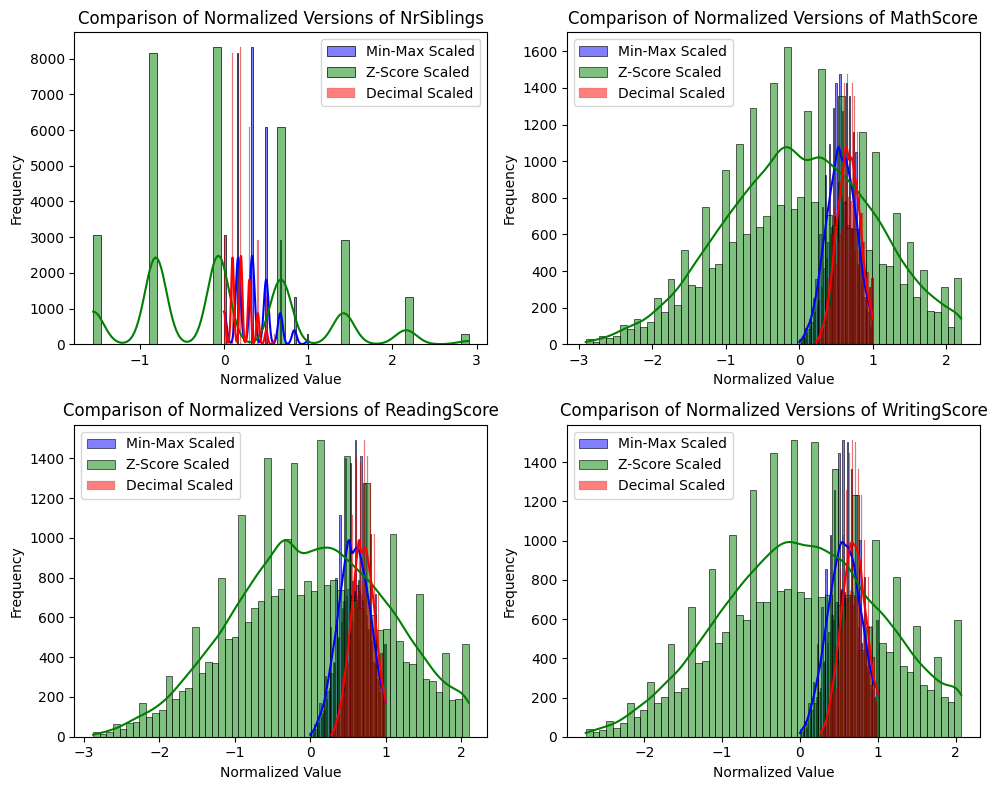

In [22]:
# Plotting normalized versions of the specified columns
plt.figure(figsize=(10, 8))

for i, column in enumerate(columns_to_normalize, 1):
    plt.subplot(2, 2, i)  # Create subplots
    # Plot each normalization method
    sns.histplot(data[column + '_min_max_scaled'], color='blue', label='Min-Max Scaled', kde=True)
    sns.histplot(data[column + '_zscore_scaled'], color='green', label='Z-Score Scaled', kde=True)
    sns.histplot(data[column + '_decimal_scaled'], color='red', label='Decimal Scaled', kde=True)
    plt.title(f'Comparison of Normalized Versions of {column}')
    plt.xlabel('Normalized Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define normalization functions
def min_max_normalize(column_data, column_name):
    min_max_scaler = MinMaxScaler()
    data[column_name + '_min_max_scaled'] = min_max_scaler.fit_transform(column_data.values.reshape(-1, 1))

def z_score_normalize(column_data, column_name):
    z_score_scaler = StandardScaler()
    data[column_name + '_zscore_scaled'] = z_score_scaler.fit_transform(column_data.values.reshape(-1, 1))

# Apply normalization methods
min_max_columns = ['NrSiblings']
z_score_columns = ['MathScore', 'ReadingScore', 'WritingScore']

for col in min_max_columns:
    min_max_normalize(data[col].dropna(), col)

for col in z_score_columns:
    z_score_normalize(data[col].dropna(), col)

# Display the first few rows of the DataFrame to verify normalization
print(data.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female     group C   bachelor's degree      standard     none   
1           1  female     group C        some college      standard     none   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  ...  \
0             married     regularly          yes         3.0  ...   
1             married     sometimes          yes         0.0  ...   
2              single     sometimes          yes         4.0  ...   
3             married         never           no         1.0  ...   
4             married     sometimes          yes         0.0  ...   

  NrSiblings_decimal_scaled MathScore_min_max_scaled  MathScore_zscore_scaled  \
0                      

# Univariate - Categorical DataFrequency Analysis)

In [25]:
import pandas as pd

# Task 1.1.3: Categorical Data Analysis

# Frequency Table for 'Gender'
gender_frequency = data['Gender'].value_counts()

# Frequency Table for 'EthnicGroup'
ethnic_group_frequency = data['EthnicGroup'].value_counts()

# Frequency Table for 'ParentEduc'
parent_educ_frequency = data['ParentEduc'].value_counts()

# Frequency Table for 'LunchType'
lunch_type_frequency = data['LunchType'].value_counts()

# Frequency Table for 'TestPrep'
testprep_frequency = data['TestPrep'].value_counts()

# Frequency Table for 'ParentMaritalStatus'
parent_marital_status_frequency = data['ParentMaritalStatus'].value_counts()

# Frequency Table for 'PracticeSport'
practice_sport_frequency = data['PracticeSport'].value_counts()

# Frequency Table for 'IsFirstChild'
is_first_child_frequency = data['IsFirstChild'].value_counts()

# Display the frequency tables
print("Frequency Table for Gender:")
print(gender_frequency)
print("\nFrequency Table for EthnicGroup:")
print(ethnic_group_frequency)
print("\nFrequency Table for ParentEduc:")
print(parent_educ_frequency)
print("\nFrequency Table for LunchType:")
print(lunch_type_frequency)
print("\nFrequency Table for TestPrep:")
print(testprep_frequency)
print("\nFrequency Table for ParentMaritalStatus:")
print(parent_marital_status_frequency)
print("\nFrequency Table for PracticeSport:")
print(practice_sport_frequency)
print("\nFrequency Table for IsFirstChild:")
print(is_first_child_frequency)

# Mode Calculation for 'Gender' and 'EthnicGroup'
gender_mode = data['Gender'].mode()[0]
ethnic_group_mode = data['EthnicGroup'].mode()[0]

# Display the modes
print("\nMode for Gender:", gender_mode)
print("Mode for EthnicGroup:", ethnic_group_mode)

Frequency Table for Gender:
Gender
female    15230
male      14955
Name: count, dtype: int64

Frequency Table for EthnicGroup:
EthnicGroup
group C    10868
group D     7414
group B     5733
group E     3993
group A     2177
Name: count, dtype: int64

Frequency Table for ParentEduc:
ParentEduc
some college          8339
high school           5596
associate's degree    5492
some high school      5406
bachelor's degree     3344
master's degree       2008
Name: count, dtype: int64

Frequency Table for LunchType:
LunchType
standard        19665
free/reduced    10520
Name: count, dtype: int64

Frequency Table for TestPrep:
TestPrep
none         20338
completed     9847
Name: count, dtype: int64

Frequency Table for ParentMaritalStatus:
ParentMaritalStatus
married     17775
single       6984
divorced     4844
widowed       582
Name: count, dtype: int64

Frequency Table for PracticeSport:
PracticeSport
sometimes    15607
regularly    10640
never         3938
Name: count, dtype: int64

Frequenc

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


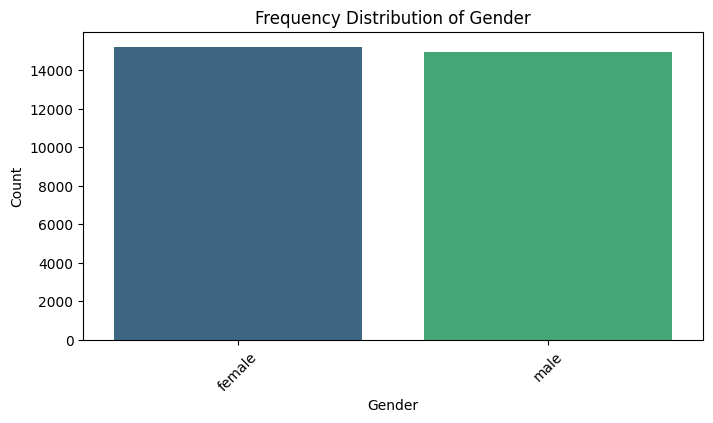

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


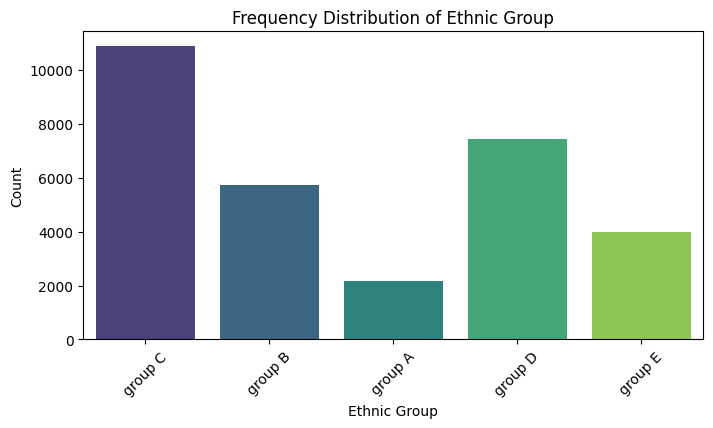

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


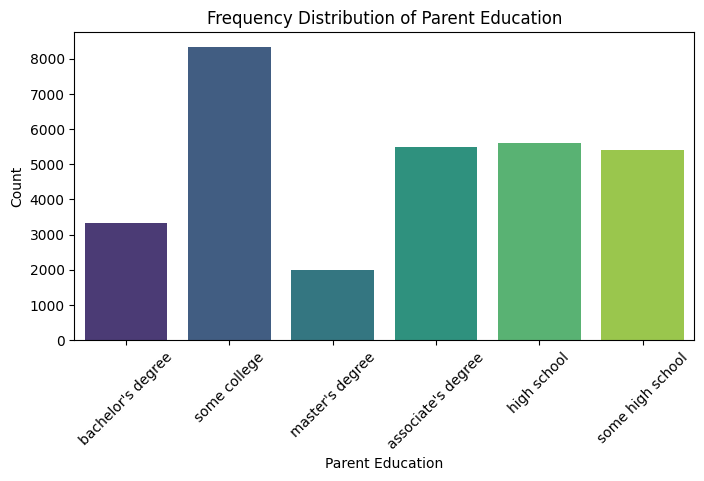

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


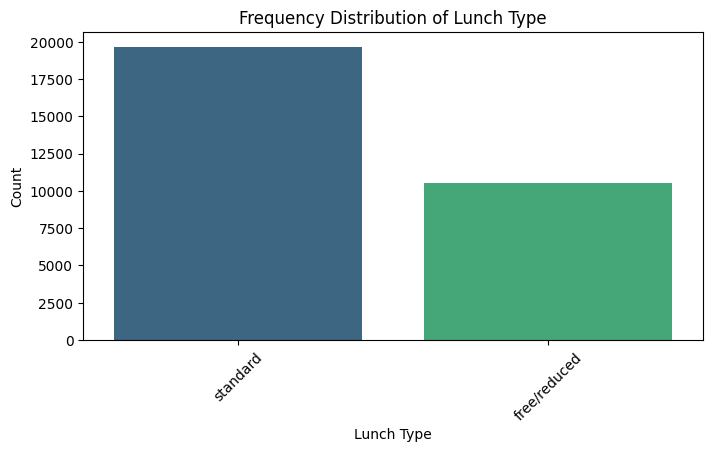

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


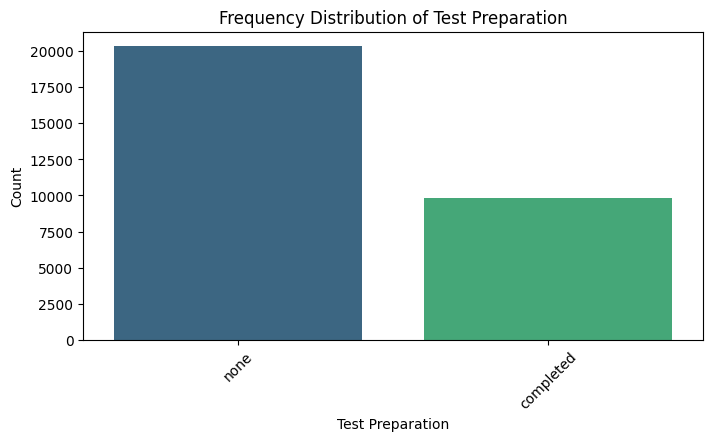

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


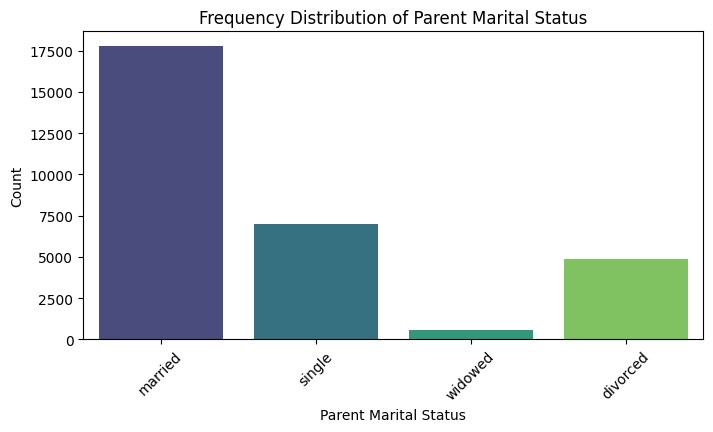

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


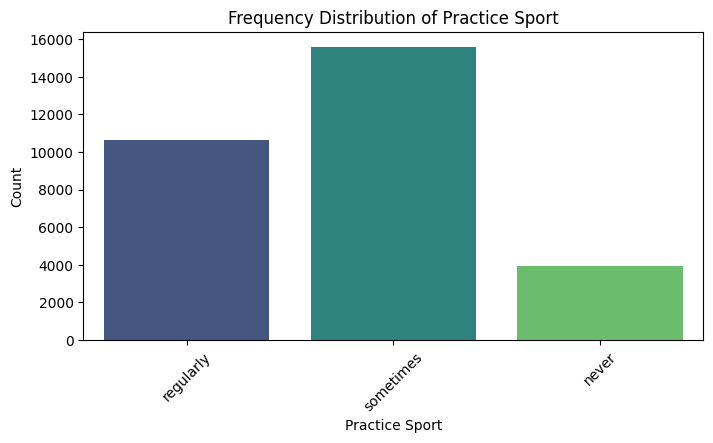

<ipython-input-27-666bf23117cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="viridis")


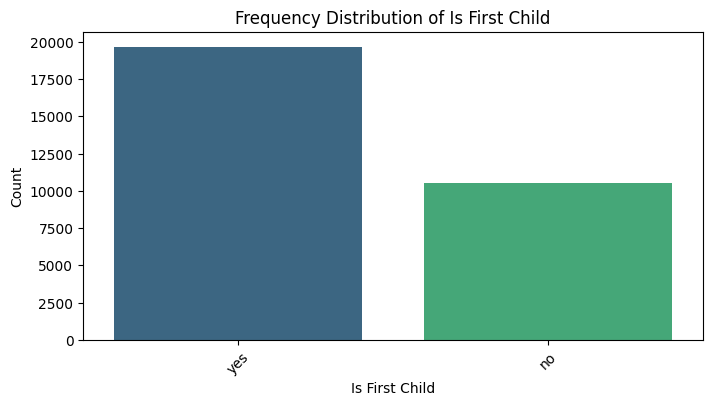

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Define a function to plot frequency tables
def plot_frequency_table(column_name, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column_name, palette="viridis")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Plot frequency distributions
plot_frequency_table('Gender', 'Frequency Distribution of Gender', 'Gender', 'Count')
plot_frequency_table('EthnicGroup', 'Frequency Distribution of Ethnic Group', 'Ethnic Group', 'Count')
plot_frequency_table('ParentEduc', 'Frequency Distribution of Parent Education', 'Parent Education', 'Count')
plot_frequency_table('LunchType', 'Frequency Distribution of Lunch Type', 'Lunch Type', 'Count')
plot_frequency_table('TestPrep', 'Frequency Distribution of Test Preparation', 'Test Preparation', 'Count')
plot_frequency_table('ParentMaritalStatus', 'Frequency Distribution of Parent Marital Status', 'Parent Marital Status', 'Count')
plot_frequency_table('PracticeSport', 'Frequency Distribution of Practice Sport', 'Practice Sport', 'Count')
plot_frequency_table('IsFirstChild', 'Frequency Distribution of Is First Child', 'Is First Child', 'Count')

# Correlation Matrix

Correlation Matrix:
              NrSiblings  MathScore  ReadingScore  WritingScore
NrSiblings      1.000000  -0.005007     -0.003174     -0.005198
MathScore      -0.005007   1.000000      0.811079      0.799870
ReadingScore   -0.003174   0.811079      1.000000      0.950572
WritingScore   -0.005198   0.799870      0.950572      1.000000


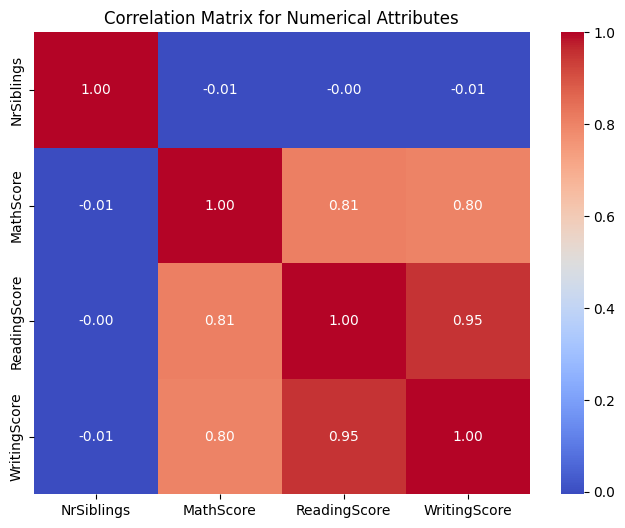

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical columns from your dataset
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Attributes')
plt.show()

In [31]:
print(data.columns)

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore', 'NrSiblings_min_max_scaled',
       'NrSiblings_zscore_scaled', 'NrSiblings_decimal_scaled',
       'MathScore_min_max_scaled', 'MathScore_zscore_scaled',
       'MathScore_decimal_scaled', 'ReadingScore_min_max_scaled',
       'ReadingScore_zscore_scaled', 'ReadingScore_decimal_scaled',
       'WritingScore_min_max_scaled', 'WritingScore_zscore_scaled',
       'WritingScore_decimal_scaled'],
      dtype='object')


Correlation Matrix:
                             NrSiblings  MathScore  ReadingScore  \
NrSiblings                     1.000000  -0.005007     -0.003174   
MathScore                     -0.005007   1.000000      0.811079   
ReadingScore                  -0.003174   0.811079      1.000000   
WritingScore                  -0.005198   0.799870      0.950572   
NrSiblings_min_max_scaled      1.000000  -0.005007     -0.003174   
NrSiblings_zscore_scaled       1.000000  -0.005007     -0.003174   
NrSiblings_decimal_scaled      1.000000  -0.005007     -0.003174   
MathScore_min_max_scaled      -0.005007   1.000000      0.811079   
MathScore_zscore_scaled       -0.005007   1.000000      0.811079   
MathScore_decimal_scaled      -0.005007   1.000000      0.811079   
ReadingScore_min_max_scaled   -0.003174   0.811079      1.000000   
ReadingScore_zscore_scaled    -0.003174   0.811079      1.000000   
ReadingScore_decimal_scaled   -0.003174   0.811079      1.000000   
WritingScore_min_max_scaled 

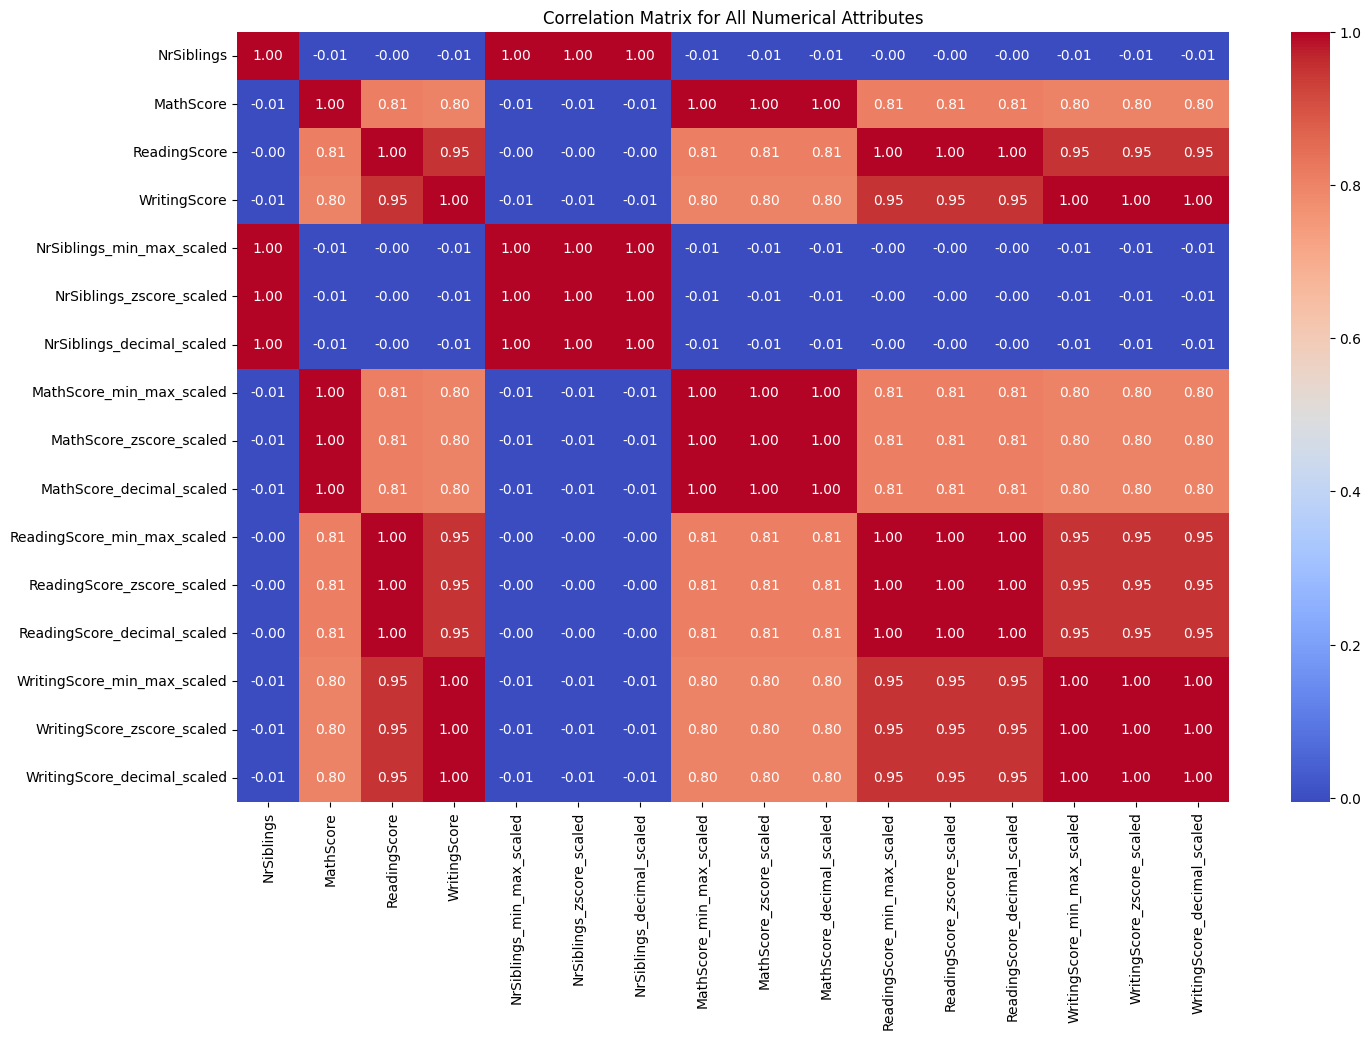

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns including both original numerical and normalized columns
numerical_columns = [
    'NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore',
    'NrSiblings_min_max_scaled', 'NrSiblings_zscore_scaled', 'NrSiblings_decimal_scaled',
    'MathScore_min_max_scaled', 'MathScore_zscore_scaled', 'MathScore_decimal_scaled',
    'ReadingScore_min_max_scaled', 'ReadingScore_zscore_scaled', 'ReadingScore_decimal_scaled',
    'WritingScore_min_max_scaled', 'WritingScore_zscore_scaled', 'WritingScore_decimal_scaled'
]

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for All Numerical Attributes')
plt.show()

# Scatter Plot

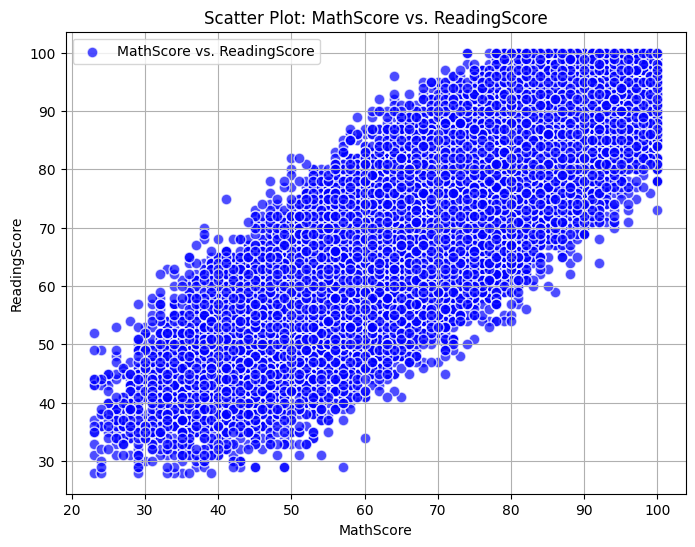

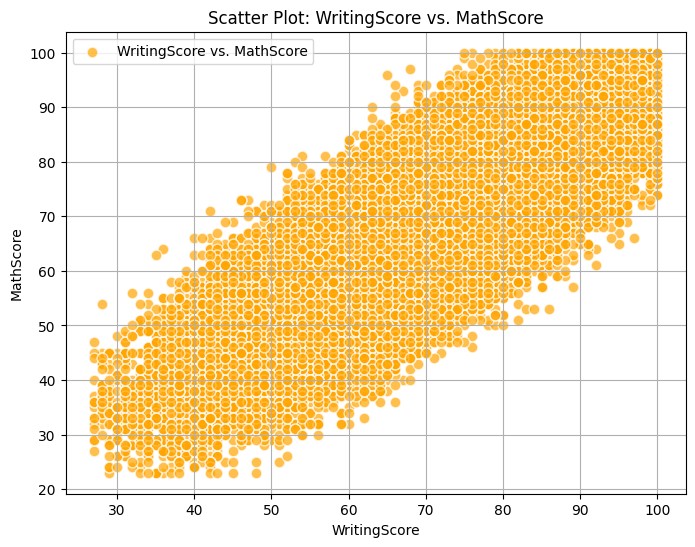

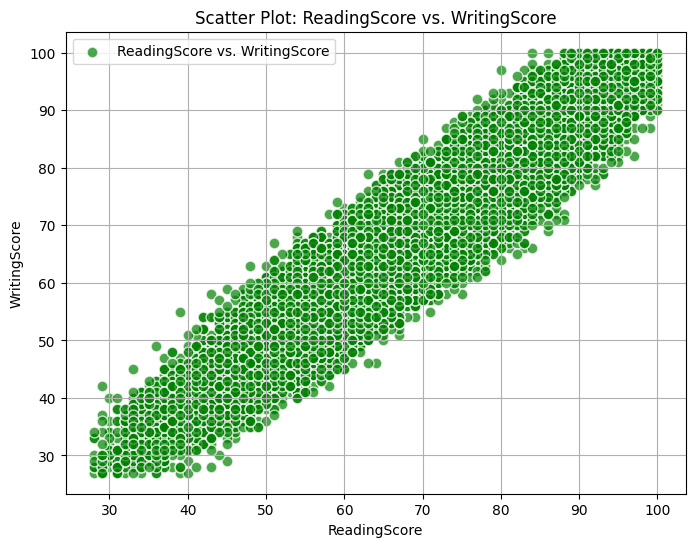

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatter Plot for MathScore vs. ReadingScore
plt.figure(figsize=(8, 6))
plt.scatter(data['MathScore'], data['ReadingScore'], alpha=0.7, c='blue', edgecolors='w', s=60, label='MathScore vs. ReadingScore')
plt.title('Scatter Plot: MathScore vs. ReadingScore')
plt.xlabel('MathScore')
plt.ylabel('ReadingScore')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot for WritingScore vs. MathScore
plt.figure(figsize=(8, 6))
plt.scatter(data['WritingScore'], data['MathScore'], alpha=0.7, c='orange', edgecolors='w', s=60, label='WritingScore vs. MathScore')
plt.title('Scatter Plot: WritingScore vs. MathScore')
plt.xlabel('WritingScore')
plt.ylabel('MathScore')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot for ReadingScore vs. WritingScore
plt.figure(figsize=(8, 6))
plt.scatter(data['ReadingScore'], data['WritingScore'], alpha=0.7, c='green', edgecolors='w', s=60, label='ReadingScore vs. WritingScore')
plt.title('Scatter Plot: ReadingScore vs. WritingScore')
plt.xlabel('ReadingScore')
plt.ylabel('WritingScore')
plt.legend()
plt.grid(True)
plt.show()

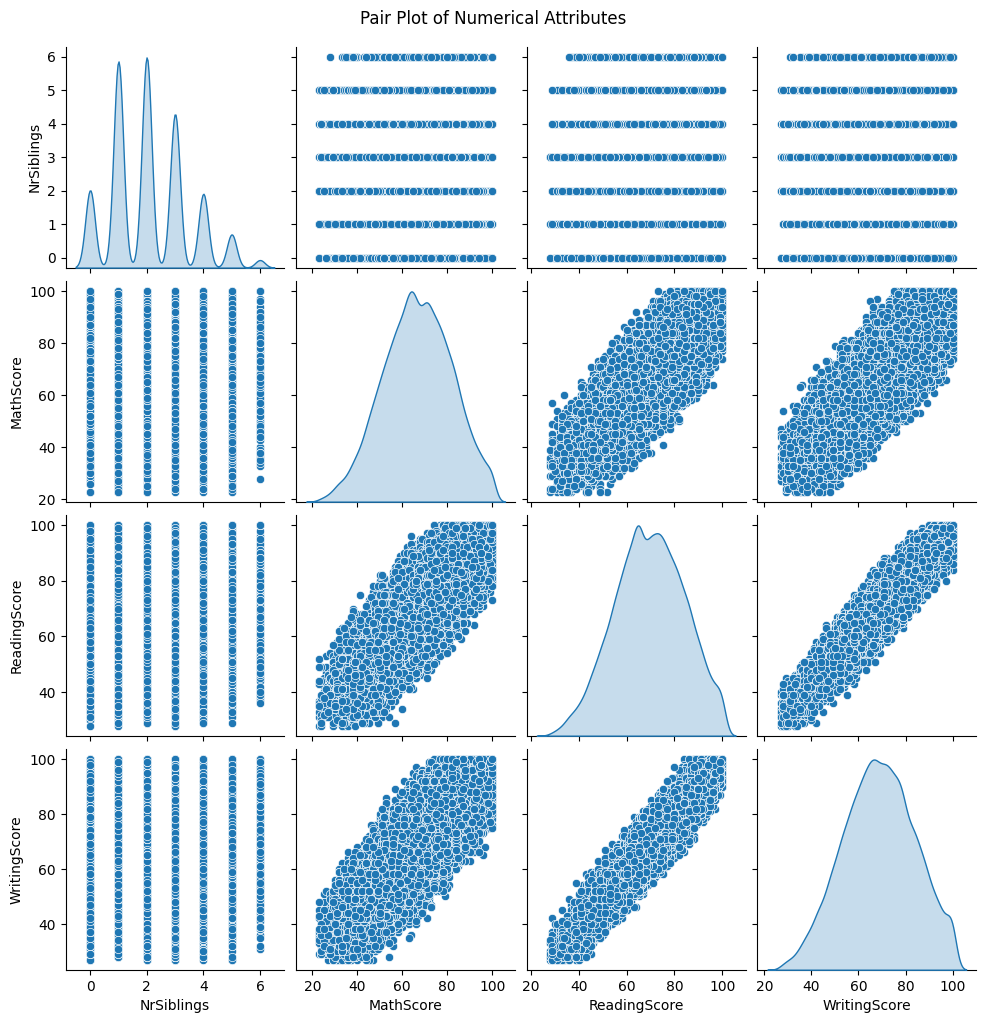

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# If not, load your dataset with the appropriate file path and sheet name
# data = pd.read_excel('your_file_path.xlsx', sheet_name='dataset')

# Select numerical columns for the pair plot
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
data_numerical = data[numerical_columns]

# Create a pair plot
sns.pairplot(data_numerical, diag_kind='kde')  # diag_kind='kde' adds KDE plots on the diagonal

# Show the plot
plt.suptitle('Pair Plot of Numerical Attributes', y=1.02)  # Adjust the title position
plt.show()

# Preparing for modeling

In [41]:
# 1. Create a Composite Score for Overall Performance
data['OverallPerformance'] = (data['MathScore'] + data['ReadingScore'] + data['WritingScore']) / 3

# 2. Define Independent Variables (Predictors)
feature_cols = ['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']
X = data[feature_cols]

# 3. Define Dependent Variable (Target)
y = data['OverallPerformance']

# Split data and built the model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
linreg = LinearRegression()

# Train the model
linreg.fit(X_train, y_train)

# Print the intercept and coefficients
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

Intercept: -2.842170943040401e-14
Coefficients: [3.33333333e-01 3.33333333e-01 3.33333333e-01 8.78203760e-18]


In [43]:
# Get the intercept and coefficients
intercept = linreg.intercept_
coefficients = linreg.coef_
# Get the feature names (assuming X is a DataFrame)
feature_names = X.columns
# Print the intercept
print(f"Intercept (c): {intercept}")
# Print the coefficients with their corresponding feature names
for coef, feature in zip(coefficients, feature_names):
    print(f"Coefficient for {feature} (m): {coef}")

# Construct the regression equation dynamically as a string
equation = f"{y.name} = " # Dynamically use the name of the target variable

# Add each term (coefficient * feature) to the equation
terms = []
for coef, feature in zip(coefficients, feature_names):
    term = f"({coef:.4f} * {feature})"
    terms.append(term)

# Join all terms with ' + ' and add the intercept
equation += " + ".join(terms)
equation += f" + ({intercept:.4f})"

# Display the regression equation
print("\nRegression Equation:")
print(equation)

Intercept (c): -2.842170943040401e-14
Coefficient for MathScore (m): 0.33333333333333365
Coefficient for ReadingScore (m): 0.3333333333333335
Coefficient for WritingScore (m): 0.3333333333333335
Coefficient for NrSiblings (m): 8.782037597132586e-18

Regression Equation:
OverallPerformance = (0.3333 * MathScore) + (0.3333 * ReadingScore) + (0.3333 * WritingScore) + (0.0000 * NrSiblings) + (-0.0000)


# Evaluated the train model with test set

In [44]:
import numpy as np
import pandas as pd

# Predict using the linear regression model
y_pred = linreg.predict(X_test)

# Ensure y_test is a numpy array
y_test = np.array(y_test)

# Round predictions to 2 decimal places
y_pred = np.round(y_pred, 2)

# Convert to DataFrame for comparison
df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})

# Display the DataFrame
pd.set_option('display.max_rows', df.shape[0] + 1)
print(df)

          Actual  Predicted
0      72.000000      72.00
1      52.333333      52.33
2      54.333333      54.33
3      59.333333      59.33
4      80.000000      80.00
5      37.666667      37.67
6      56.666667      56.67
7      84.333333      84.33
8      58.333333      58.33
9      65.333333      65.33
10     68.666667      68.67
11     68.333333      68.33
12     66.666667      66.67
13     64.000000      64.00
14     47.666667      47.67
15     59.333333      59.33
16     71.666667      71.67
17     76.333333      76.33
18     53.000000      53.00
19     62.333333      62.33
20     94.666667      94.67
21     42.666667      42.67
22     88.666667      88.67
23    100.000000     100.00
24     82.666667      82.67
25     78.333333      78.33
26     71.000000      71.00
27     63.666667      63.67
28     77.000000      77.00
29     82.333333      82.33
30     68.666667      68.67
31     46.666667      46.67
32     90.666667      90.67
33     68.666667      68.67
34     50.000000    

In [45]:
from sklearn import metrics
import numpy as np

# Calculate and print evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', linreg.score(X_test, y_test))

Mean Absolute Error: 0.002204185301750163
Mean Squared Error: 7.347284339166695e-06
Root Mean Squared Error: 0.0027105874527796913
R-squared: 1.0


# Visualize - Actual vs Predicted Values and Residuals

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


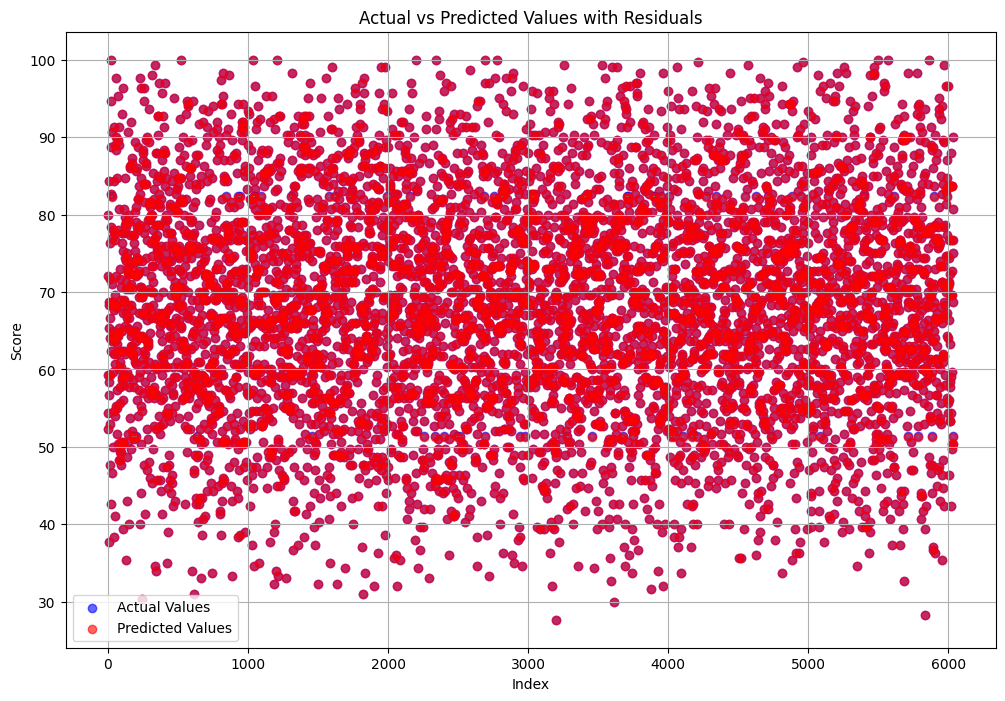

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the Actual and Predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.reset_index(drop=True, inplace=True)

# Calculate residuals (Actual - Predicted)
results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']

# Plotting the results
plt.figure(figsize=(12, 8))

# Scatter plot for Actual vs Predicted values
plt.scatter(range(len(results_df)), results_df['Actual'], color='blue', label='Actual Values', alpha=0.6)
plt.scatter(range(len(results_df)), results_df['Predicted'], color='red', label='Predicted Values', alpha=0.6)

# Residuals plot
for i in range(len(results_df)):
    plt.plot([i, i], [results_df['Actual'][i], results_df['Predicted'][i]], color='gray', linestyle='--', alpha=0.5)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Actual vs Predicted Values with Residuals')
plt.legend()
plt.grid(True)
plt.show()

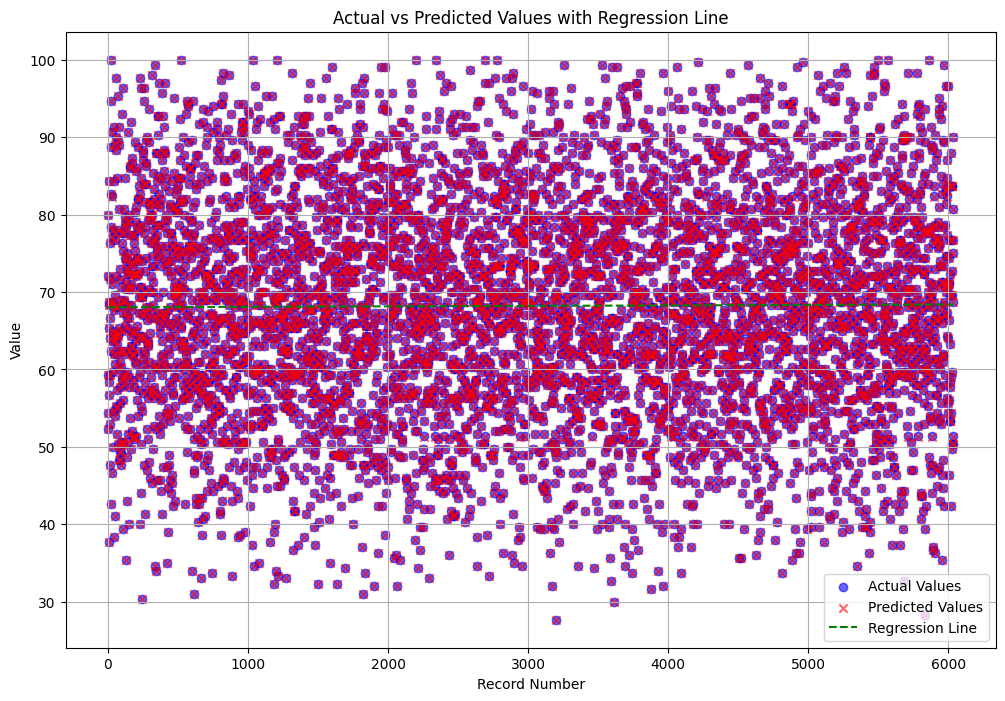

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming y_test and y_pred are already defined and available

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Scatter plot of actual vs predicted
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', marker='o', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x', alpha=0.6)

# Fit a linear regression model to the actual vs predicted data for drawing the regression line
regressor = LinearRegression()
regressor.fit(np.array(range(len(y_test))).reshape(-1, 1), y_test)

# Generate predictions for drawing the regression line
regression_line = regressor.predict(np.array(range(len(y_test))).reshape(-1, 1))

# Plot the regression line
plt.plot(range(len(y_test)), regression_line, color='green', linestyle='--', label='Regression Line')

# Add labels and title
plt.xlabel('Record Number')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values with Regression Line')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


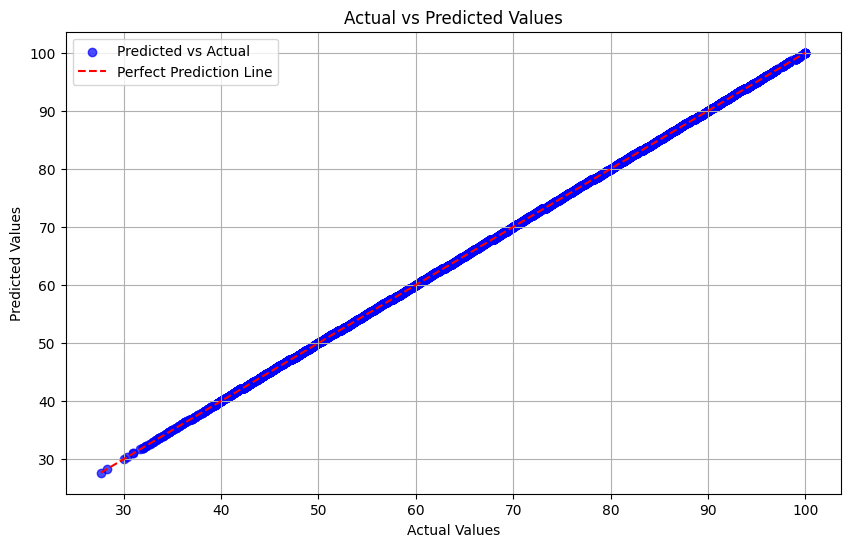

In [48]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)

# Add a line representing the perfect prediction (Actual = Predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()